# Improtation des libraries necessaires

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf #to be able to use the dataset
from keras.datasets import fashion_mnist #fashion_mnist dataset

import colorama
from colorama import Fore

plt.style.use('dark_background')

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(Fore.GREEN + "Data is imported succesfully !")

Data is imported succesfully !


### <font color='yellow'>Kohonen Self-Organising-Map Algorithm brief explanation </font>


is a type of Artificial Neural Network which is also inspired by biological models of neural systems from the 1970s. It follows an unsupervised learning approach and trained its network through a competitive learning algorithm. SOM is used for clustering and mapping (or dimensionality reduction) techniques to map multidimensional data onto lower-dimensional which allows people to reduce complex problems for easy interpretation. SOM has two layers, one is the Input layer and the other one is the Output layer. The architecture of the Self Organizing Map with two clusters and n input features of any sample is given below: 



![SNOWFALL](som.png)

Let’s say an input data of size (m, n) where m is the number of training examples and n is the number of features in each example. First, it initializes the weights of size (n, C) where C is the number of clusters. Then iterating over the input data, for each training example, it updates the winning vector (weight vector with the shortest distance (e.g Euclidean distance) from training example). Weight updation rule is given by : 

$w{ij} = w_{ij}(old) + alpha(t) *  (x_{i}^{k} - w_{ij}(old))$

where alpha is a learning rate at time t, j denotes the winning vector, i denotes the ith feature of training example and k denotes the kth training example from the input data. After training the SOM network, trained weights are used for clustering new examples. A new example falls in the cluster of winning vectors. 

#### <font color='yellow'>Algorithme </font>

##### 1 - Weight initialization
##### 2 - For 1 to N number of epochs
##### 3 - Select a training example
##### 4 - Compute the winning vector
##### 5 - Update the winning vector
##### 6 - Repeat steps 3, 4, 5 for all training examples.
##### 7 - Clustering the test sample

#### <font color='yellow'>Parameters Initialisation </font>

In [3]:
width,height=20,20 #Kohonen Layer Width and height so it's 400 Kohonen Nodes which means 400 clusters !
k = np.random.random(size=28*28*width*height)*256 # each node has 28by28 Data
k = k.reshape(width,height,28,28)
eta = 0.1 # Learning Rate

In [4]:
print(x_train.shape)

(60000, 28, 28)


Plotting the Image

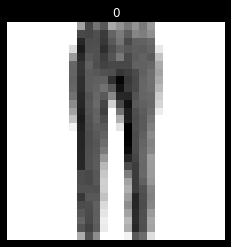

In [31]:
plt.imshow(x_train[542].astype(int),cmap=plt.get_cmap('gray_r')),plt.title(y_train[1])
plt.axis('off')
plt.show()


#### <font color='yellow'>Learning Algorithm ! </font>

In [6]:
import random
import time
start_time = time.time()


for i in range(250000):
  x_id = (int)(random.random()*len(x_train))
  d=np.asarray([np.sum((x_train[x_id]-k[i][j])**2) for i in range(width) for j in range(height)])
  winner = np.argmin(d)
  w = winner//width,winner%width
  k[w[0],w[1]] = k[w[0],w[1]]+eta*(x_train[x_id]-k[w[0],w[1]])
  eta_n = eta*0.3
  if w[0]-1 >= 0:
      k[w[0]-1,w[1]] = k[w[0]-1,w[1]]+eta_n*(x_train[x_id]-k[w[0]-1,w[1]])
  if w[0]+1 < width:
      k[w[0]+1,w[1]] = k[w[0]+1,w[1]]+eta_n*(x_train[x_id]-k[w[0]+1,w[1]])
  if w[1]-1 >= 0:
      k[w[0],w[1]-1] = k[w[0],w[1]-1]+eta_n*(x_train[x_id]-k[w[0],w[1]-1])
  if w[1]+1 < height:
      k[w[0],w[1]+1] = k[w[0],w[1]+1]+eta_n*(x_train[x_id]-k[w[0],w[1]+1])
  if(i%1000 == 0):
    pass
print("--- %s seconds ---" % (time.time() - start_time))
print(Fore.GREEN + '\nLearning Done !',end='')


--- 1360.6189444065094 seconds ---

Learning Done !

#### <font color='yellow'>Saving the nodes </font>

In [7]:
new_x_train = []

for ii in range(len(x_train)):
  d=np.asarray([np.sum((x_train[ii]-k[i][j])**2) for i in range(width) for j in range(height)])
  winner = np.argmin(d)
  w = winner//width,winner%width
  new_x_train.append([w[0],w[1]])

new_x_train = np.array(new_x_train)

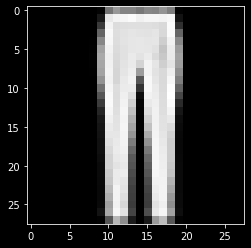

In [19]:
plt.imshow(k[8][0],cmap='gray')

#### <font color='yellow'>Let's have a look to Our nodes map </font>

In [71]:
data_node = new_x_train
data_node[:3]
for i in range(19):
    plt.figure(figsize=(15,7))
    for j in range(19):
        plt.subplot(20,20,j + 1),plt.imshow(k[i+1][j+1],cmap='gray')
        plt.axis('off')
    plt.imshow

In [27]:
k.shape

(20, 20, 28, 28)

let's have a test an try to get the train[542]

First we check which node it correspond to !

In [55]:
train = 146
x = data_node[train]
x

array([8, 2], dtype=int64)

it correspond to the node in the position of 9 and 5

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1fb412375b0>)

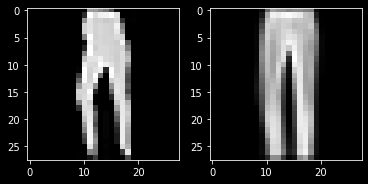

In [57]:
plt.subplot(121),plt.imshow(x_train[train],cmap='gray')
plt.subplot(122),plt.imshow(k[x[0]][x[1]],cmap='gray')

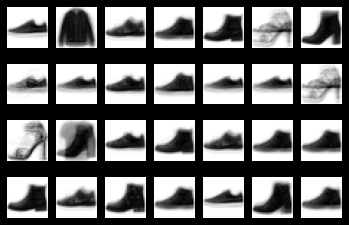

In [60]:

for i in range(28):
  plt.subplot(4, 7,i +1),plt.imshow(k[data_node[i+1][1]][data_node[6][1]].astype(int),cmap=plt.get_cmap('gray_r'))
  plt.axis('off')
plt.show()


Each node has 28 by 28 data

#### <font color='yellow'>Comparing the Results </font>

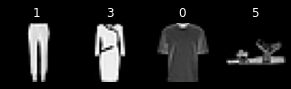

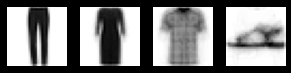

In [65]:
m=59996
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(4,4,i +1),plt.imshow(x_train[i+m],cmap='gray'),plt.title(y_train[i+m])
    plt.axis('off')
plt.show()
plt.figure(figsize=(5,5))
for i in range(4):
  plt.subplot(4, 4,i +1),plt.imshow(k[data_node[i+m][0]][data_node[i+m][1]].astype(int),cmap=plt.get_cmap('gray_r'))
  plt.axis('off')
plt.show()

we can see clearly that for the first column of picture the training set correspond to their exact node after the learning ! 
#### which means the quality of the Kohonen Model !
